Do wykonania zadań niezbędne będzie pobranie bazy filmów oraz bazy gatunków:
- Baza filmów
- Baza gatunków

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.ticker as ticker
%matplotlib inline

df_movie = pd.read_csv('tmdb_movies.csv')
df_genres = pd.read_csv('tmdb_genres.csv')


In [2]:
df_movie.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [3]:
df_genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [4]:
#zmiana nazwy kolumny Unnamed: 0 w df_genres
df_genres = df_genres.rename(columns={"Unnamed: 0": "genre_id"})

#połączenie tabel
merged_df = pd.merge(df_movie, df_genres, on="genre_id", how="left")

merged_df.head()


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action


1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [5]:


def top_movies_by_rating(merged_df):
    q3 = merged_df['vote_count'].quantile(0.75)
    filtered_votes_df = merged_df[merged_df['vote_count'] > q3]
    sorted_by_average_df = filtered_votes_df.sort_values(by='vote_average', ascending=False)
    return sorted_by_average_df.head(10)

top_10 = top_movies_by_rating(merged_df)[['title', 'genres', 'vote_count', 'vote_average']]
top_10

,title,genres,vote_count,vote_average
1881,The Shawshank Redemption,Drama,8205,8.5
3337,The Godfather,Drama,5893,8.4
2731,The Godfather: Part II,Drama,3338,8.3
3232,Pulp Fiction,Thriller,8428,8.3
3865,Whiplash,Drama,4254,8.3
1818,Schindler's List,Drama,4329,8.3
662,Fight Club,Drama,9413,8.3
2294,Spirited Away,Fantasy,3840,8.3
2170,Psycho,Drama,2320,8.2
3719,One Flew Over the Cuckoo's Nest,Drama,2919,8.2


2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:
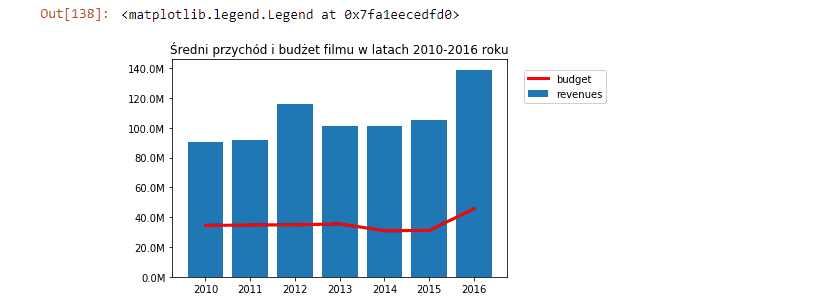

In [6]:
def average(merged_df):
    # Wybór interesujących kolumn
    columns_df = merged_df[['revenue', 'budget', 'release_date']].copy()

    # Konwersja release_date na datetime
    columns_df['release_date'] = pd.to_datetime(columns_df['release_date'], errors='coerce')

    # Sprawdzenie, czy istnieją niepoprawne daty
    if columns_df['release_date'].isna().any():
        columns_df = columns_df.dropna(subset=['release_date'])

    # Wyciągnięcie tylko roku
    columns_df['release_year'] = columns_df['release_date'].dt.year
    columns_df.drop(columns=['release_date'], inplace=True)

    # Filtrowanie po latach
    filtered_df = columns_df.loc[(columns_df['release_year'] >= 2010) & (columns_df['release_year'] <= 2016)].copy()

    # Przychód w milionach
    filtered_df['revenue'] = filtered_df['revenue'] / 1e6
    filtered_df['budget'] = filtered_df['budget'] / 1e6
    
    # Grupowanie po roku i liczenie średnich
    grouped_df = filtered_df.groupby('release_year')[['revenue', 'budget']].mean().round(1).reset_index()

    return grouped_df


In [7]:
average_revenue_budget = average(merged_df)

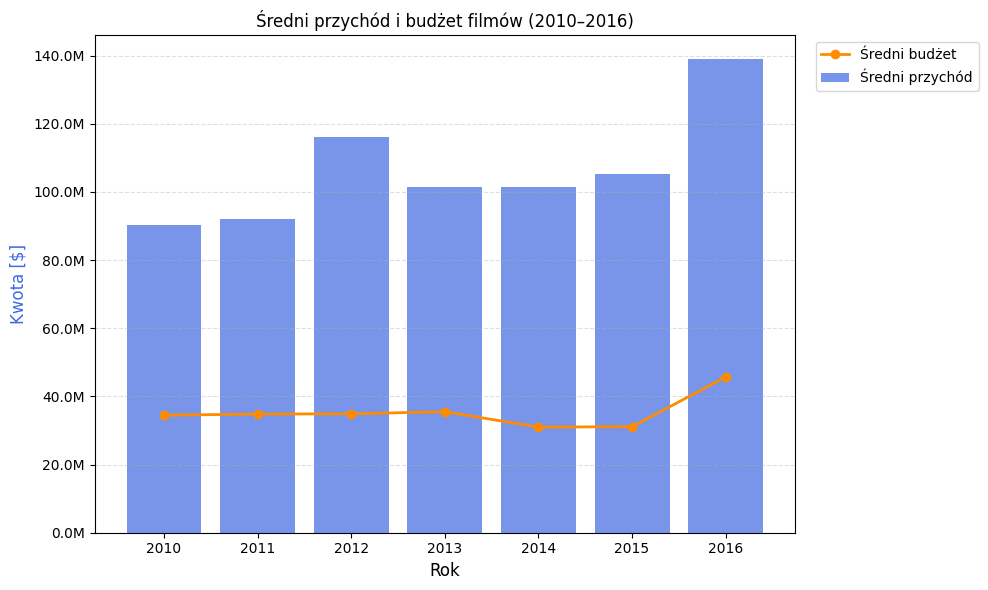

In [15]:
# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(average_revenue_budget['release_year'], average_revenue_budget['revenue'], 
        color='royalblue', label='Średni przychód', alpha=0.7)


ax.plot(average_revenue_budget['release_year'], average_revenue_budget['budget'], 
         color='darkorange', marker='o', linestyle='-', linewidth=2, label='Średni budżet')

ax.set_xlabel('Rok', fontsize=12)
ax.set_ylabel('Kwota [$]', fontsize=12, color='royalblue')
ax.set_title('Średni przychód i budżet filmów (2010–2016)')
ax.set_xticks(average_revenue_budget['release_year'])
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax.grid(axis='y', linestyle='--', alpha=0.4)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.1f}M"))

plt.tight_layout()

4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [9]:
def most_common_genre(merged_df):
    genre_counts = merged_df['genres'].value_counts()
    most_common = genre_counts.idxmax()
    count = genre_counts.max()
    return most_common, count

genre, count = most_common_genre(merged_df)

print(f"Gatunek, który pojawia się najczęściej: {genre}")
print(f"Liczba filmów tego gatunku: {count}")

Gatunek, który pojawia się najczęściej: Drama
Liczba filmów tego gatunku: 1207


5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [10]:
def longest_runtime(merged_df):
    genre_runtime = merged_df.groupby('genres')['runtime'].mean()
    longest_runtime_genre = genre_runtime.idxmax()
    longest_runtime = genre_runtime.max()
    return longest_runtime_genre, longest_runtime

genre, avg_runtime = longest_runtime(merged_df)

print(f"Gatunek, którego filmy trwają średnio najdłużej: {genre}, średni czas trwania filmów tego gatunku: {avg_runtime:.2f} minut")

Gatunek, którego filmy trwają średnio najdłużej: History, średni czas trwania filmów tego gatunku: 133.96 minut


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

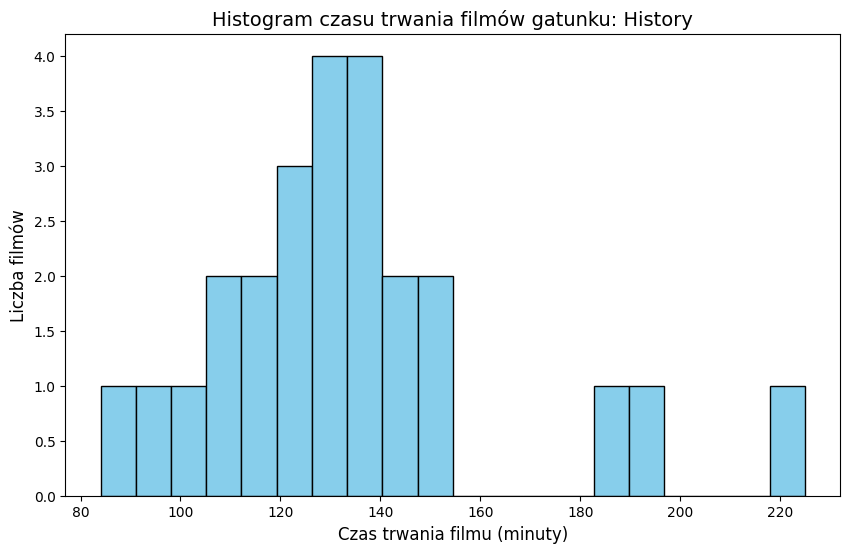

In [11]:
def plot_runtime_histogram(merged_df):
    genre, _ = longest_runtime(merged_df)
    genre_movies = merged_df[merged_df['genres'] == genre]
    ax = genre_movies['runtime'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(10, 6))
    ax.set_title(f'Histogram czasu trwania filmów gatunku: {genre}', fontsize=14)
    ax.set_xlabel('Czas trwania filmu (minuty)', fontsize=12)
    ax.set_ylabel('Liczba filmów', fontsize=12)
    plt.show()

plot_runtime_histogram(merged_df)